In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.select_dtypes(exclude=['object'])

In [5]:
df = df.fillna(df.median(),inplace=True)

In [6]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
mdsp = np.mean(df['SalePrice'])
dvsp = np.std(df['SalePrice'])
df = df[df['SalePrice'] <= mdsp+2*dvsp]
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,...,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,733.273443,57.483894,69.024338,10150.000000,5.980673,5.591983,1970.036507,1984.033644,89.330709,417.371510,...,89.635648,44.712956,22.410165,3.236220,14.654975,2.486042,45.450251,6.309234,2007.819613,169994.088046
std,422.610678,42.834148,21.520151,8328.996257,1.280915,1.118812,30.007892,20.664974,158.388068,428.452461,...,121.847895,65.573915,61.492644,28.583263,54.788508,38.316984,507.106304,2.701004,1.328156,58922.718767
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.000000,20.000000,60.000000,7438.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,69.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,...,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.000000,70.000000,78.000000,11316.000000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,...,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,339750.000000


In [10]:
df.SalePrice.describe()

count      1397.000000
mean     169994.088046
std       58922.718767
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203000.000000
max      339750.000000
Name: SalePrice, dtype: float64

In [11]:
df.LotArea.describe()

count      1397.000000
mean      10150.000000
std        8328.996257
min        1300.000000
25%        7438.000000
50%        9317.000000
75%       11316.000000
max      164660.000000
Name: LotArea, dtype: float64

In [12]:
mdl = np.mean(df['LotArea'])
dvl = np.std(df['LotArea'])
df = df[df['LotArea'] <= mdl+2*dvl]
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,...,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,733.372549,57.469136,68.562818,9461.343500,5.978214,5.594771,1970.094408,1984.047204,88.094408,407.662309,...,87.732026,43.962963,22.554103,3.283224,14.386347,2.173566,45.238925,6.319535,2007.822077,169303.716049
std,423.072175,42.577349,19.380838,3738.805464,1.275708,1.117996,30.108497,20.680254,155.917865,400.321168,...,119.625136,64.213732,61.694756,28.787558,54.286495,36.381812,510.299874,2.693042,1.330383,58835.284361
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.000000,20.000000,60.000000,7406.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128500.000000
50%,740.000000,50.000000,69.000000,9247.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,361.000000,...,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,158000.000000
75%,1098.000000,70.000000,78.000000,11228.000000,7.000000,6.000000,1999.000000,2003.000000,140.000000,680.000000,...,160.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,201800.000000
max,1460.000000,190.000000,182.000000,26178.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,1880.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,339750.000000


In [13]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


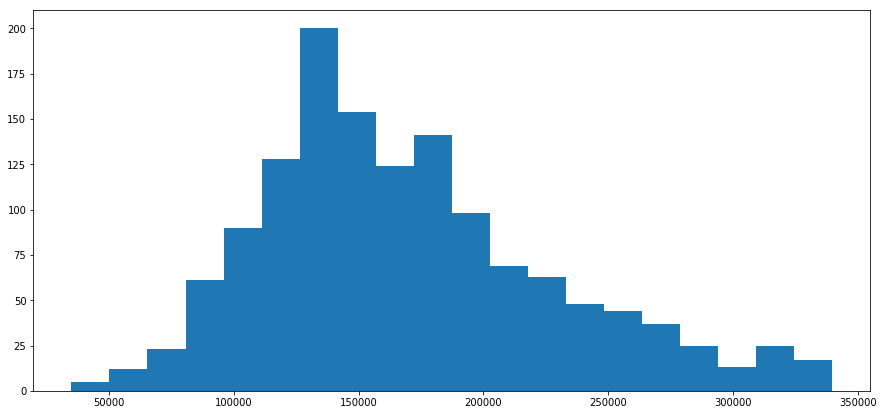

In [18]:
plt.rcParams['figure.figsize'] = [15,7]
plt.hist(df['SalePrice'],bins=20)
plt.show()

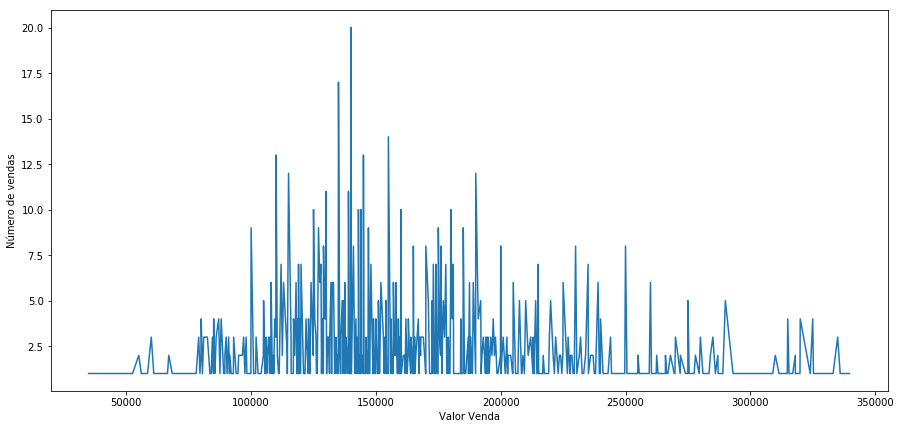

In [19]:
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(df.groupby('SalePrice').count()[['Id']])
plt.xlabel('Valor Venda')
plt.ylabel('Número de vendas')
plt.show()

In [20]:
X = df.drop('SalePrice',axis=1)
y = df.SalePrice

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1313)

In [23]:
modelrf = RandomForestRegressor()
modelrf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
model = modelrf.fit(X_train,y_train)

In [25]:
kfold = model_selection.KFold(n_splits=10,random_state=12)
scoring = 'r2'
sc1 = cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
sc1.mean()

0.84444140191275419

In [26]:

from tabulate import tabulate

header = ['features','score']
values = sorted(zip(X_train.columns,model.feature_importances_),key=lambda x: x[1]*-1)
print(tabulate(values,header,tablefmt='plain'))


features             score
OverallQual    0.562376
GrLivArea      0.125715
TotalBsmtSF    0.0583449
GarageArea     0.0397324
BsmtFinSF1     0.0270072
LotArea        0.0248246
1stFlrSF       0.019575
YearBuilt      0.0186634
YearRemodAdd   0.0181099
GarageCars     0.0179276
BsmtUnfSF      0.00753124
OverallCond    0.00733559
GarageYrBlt    0.00697546
LotFrontage    0.00694711
2ndFlrSF       0.00677268
OpenPorchSF    0.00674142
Id             0.00638996
MasVnrArea     0.00458814
WoodDeckSF     0.00456973
MoSold         0.00454047
Fireplaces     0.00386837
MSSubClass     0.00365392
FullBath       0.00322494
TotRmsAbvGrd   0.00224736
EnclosedPorch  0.00220029
YrSold         0.00186794
KitchenAbvGr   0.00146765
BsmtFinSF2     0.00139668
BsmtFullBath   0.000958644
BedroomAbvGr   0.00094621
PoolArea       0.000821738
ScreenPorch    0.000791642
HalfBath       0.000724228
LowQualFinSF   0.00038231
3SsnPorch      0.000293221
BsmtHalfBath   0.000258483
MiscVal        0.000228173


In [27]:
col = ['features','score']
fimp = pd.DataFrame(data=values,columns=col)
fimp

,features,score
0,OverallQual,0.562376
1,GrLivArea,0.125715
2,TotalBsmtSF,0.058345
3,GarageArea,0.039732
4,BsmtFinSF1,0.027007
5,LotArea,0.024825
6,1stFlrSF,0.019575
7,YearBuilt,0.018663
8,YearRemodAdd,0.018110
9,GarageCars,0.017928


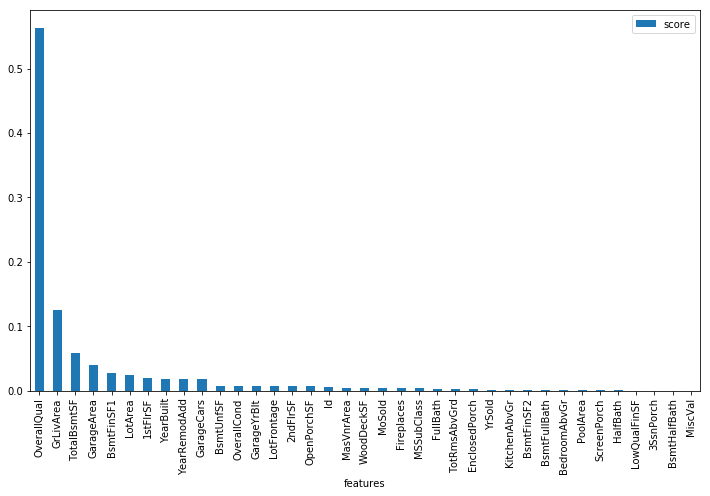

In [28]:
fimp.plot(x='features',y='score',kind='bar',figsize=(12,7))
plt.show()

In [29]:
kp = fimp[fimp.score>0.01]
kp

,features,score
0,OverallQual,0.562376
1,GrLivArea,0.125715
2,TotalBsmtSF,0.058345
3,GarageArea,0.039732
4,BsmtFinSF1,0.027007
5,LotArea,0.024825
6,1stFlrSF,0.019575
7,YearBuilt,0.018663
8,YearRemodAdd,0.018110
9,GarageCars,0.017928


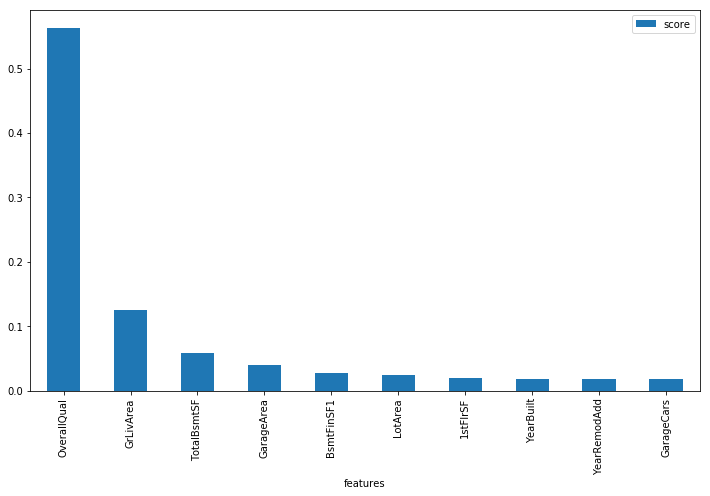

In [30]:
kp.plot(x='features',y='score',kind='bar',figsize=(12,7))
plt.show()

In [31]:
colu = []
for i in kp['features']:
    colu.append(i)

colu

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'BsmtFinSF1',
 'LotArea',
 '1stFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageCars']

In [32]:
X_train = X_train[colu].copy()
X_train

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,BsmtFinSF1,LotArea,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars
1025,5,882,882,461,138,7700,882,1972,1972,2
67,7,1479,1453,558,1013,10665,1479,2003,2003,2
1278,8,2031,1128,577,804,9473,1128,2002,2002,2
400,8,1288,1260,500,786,14963,1288,1996,1996,2
32,8,1234,1234,484,0,11049,1234,2007,2007,2
1271,6,1489,1489,462,0,9156,1489,1968,1968,2
561,5,1389,1389,418,1071,10010,1389,1974,1975,2
733,5,1144,864,264,594,10000,1144,1961,1983,1
1016,7,1504,1504,478,690,11883,1504,1996,1996,2
1426,7,2127,1223,525,1000,10944,1223,1994,1994,2


In [33]:
model2 = modelrf.fit(X_train,y_train)
sc2 = cross_val_score(model2, X_train,y_train,cv=kfold,scoring=scoring)
sc2.mean()

0.83480693635502878

In [34]:
X_test = X_test[colu].copy()
X_test

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,BsmtFinSF1,LotArea,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars
480,9,1850,1833,772,1261,16033,1850,2004,2005,3
1412,4,1040,0,420,0,7200,1040,1949,1950,2
1301,6,1494,771,213,547,7500,753,1942,1950,1
982,7,1266,1266,388,0,3182,1266,2007,2007,2
662,6,1392,1392,576,0,13560,1392,1968,1968,2
942,4,1440,1440,0,1440,7711,1440,1977,1977,0
1378,6,987,483,264,309,1953,483,1973,1973,1
667,6,1679,1408,575,1138,8125,1679,1994,1998,2
135,7,1682,1304,530,0,10400,1682,1970,1970,2
1048,5,1771,0,336,0,21750,1771,1960,2006,2


In [35]:
pred = model2.predict(X_test)
pred

array([ 308750.        ,  101790.        ,  125360.        ,
        175388.        ,  178900.        ,  197670.        ,
        100950.        ,  194490.        ,  154890.        ,
        159449.        ,  171640.        ,  288874.4       ,
        168800.        ,  106900.        ,  179143.2       ,
        146120.        ,  214350.        ,  121330.        ,
         58736.6       ,  127780.        ,  149275.        ,
        254327.8       ,  141130.        ,  122920.        ,
        190500.1       ,  129025.        ,   97690.        ,
        136675.        ,  134375.        ,  261670.        ,
        174357.5       ,  137377.6       ,  123188.3       ,
        213072.5       ,  108580.        ,  119420.        ,
        226900.        ,  132347.5       ,  127470.        ,
        101830.        ,  129430.        ,   84100.        ,
        217877.        ,  146355.        ,  151500.        ,
        176914.        ,  151120.        ,  151730.        ,
        210859.        ,

In [36]:
sct = cross_val_score(model2,X_test,pred)
sct.mean()

0.92620445286477127